0) Библиотеки

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
import scipy.stats as stat

1) Выборка с нормальным распределением

In [51]:
sample = np.array([12.3, 13.86, 14.23, 14.48, 14.67, 14.7, 14.92,
                  14.93, 15.56, 15.64, 15.86, 15.89, 15.9, 16.1, 16.43,
                  16.51, 16.66, 16.73, 16.78, 16.9, 17.06, 17.08, 17.13,
                  17.15, 17.48, 18.1, 18.12, 18.13, 18.14, 18.15, 18.32, 18.35, 18.44,
                  18.6, 18.78, 18.81, 18.95, 19.2, 19.42, 19.83, 19.97, 20.05, 20.2, 20.22,
                  20.95, 21.59, 21.66, 22.14, 23.58])

2) Среднее и дисперсия

In [52]:
mu = sample.mean()
sigm = sample.std()
print(mu, ' - arithmetic mean')
print(sigm**2, ' - dispersion')

17.645918367346937  - arithmetic mean
5.403562932111619  - dispersion


2.1) Предполагаемая функция распределения(плотность)

In [53]:
def f0(x):
    return 1/(sigm * np.sqrt(2 * np.pi)) * np.exp( -(x - mu)**2 / (2 * sigm**2) )

3) Гисторграмма выборки и плотность распределения предполагаемой случайной величины
Будем предпологать, что с.в. имеет плотность номрального распределения с полученными параметрами mu и sigm^2

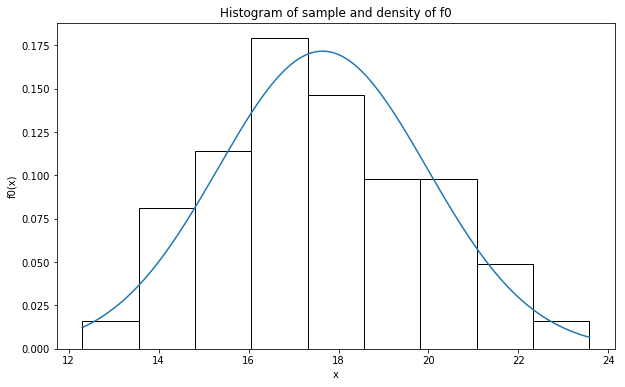

In [62]:
n = 10 #10 разбиений
bins = np.linspace(sample.min(), sample.max(), n) #промежутки разбиений от 12.3 до 23.58 10 разбиений
#h = bins[1]-bins[0] #шаг разбиения
#v = (np.histogram(sample, bins))[0] #получили частоты на каждом промежутке
#v = v / len(sample) #получили относительные чатсоты на каждом промежутке
#hist = v / h
#plt.bar(bins[:-1], hist, width= h, align = 'edge', color = 'white', edgecolor = 'black' )
hist = plt.hist(sample, bins, density=1, edgecolor = 'black', color = 'white') # строим нормированную гистограмму

#строим график плотности вероятности предполагаемого разбиения
x = np.linspace(sample.min(), sample.max(), 1000)
fx0 = f0(x)
plt.plot(x,fx0)

plt.xlabel(r'x')
plt.ylabel(r'f0(x)')
plt.title('Histogram of sample and density of f0')
fig = plt.gcf()
fig.set_size_inches(10, 6)

4.0) ФР для f0

In [55]:
def F0(x):
    return integ.quad(f0,-np.inf, x)

4) ЭФР для выборки и функция распределения для выбранного распределения f0

max|Fn(x) - F0(x)| =  0.24225407517824404


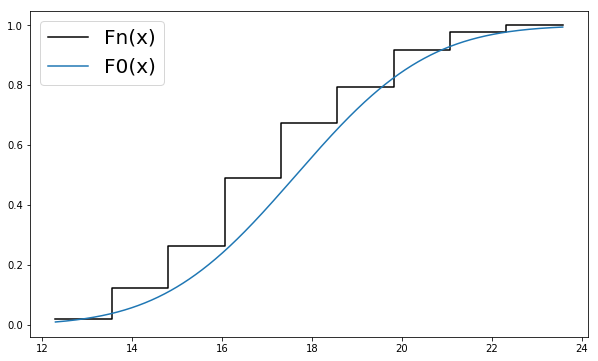

In [66]:
v = hist[0] *(bins[1] - bins[0]) #относительная частота выборки на промежутках bins
v1 = np.cumsum(v)
v1 = np.hstack((np.array([v1.min()]), v1))
p1 = plt.step(bins, v1, color = 'black')

Fp0 = []
for i in x:
    Fp0.append(F0(i)[0])
p2 = plt.plot(x, Fp0)

err1 = []
for i in bins[:-1]:
    err1.append(F0(i)[0])
err = np.abs(v1[1:] - err1)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend((p1[0], p2[0]), (r"Fn(x)", r"F0(x)"), fontsize = 20)
print("max|Fn(x) - F0(x)| = ", err.max())

5) Проврека гипотез

In [67]:
a = 0.05
stat.chi2_contingency(v)

(0.0,
 1.0,
 0,
 array([0.02040816, 0.10204082, 0.14285714, 0.2244898 , 0.18367347,
        0.12244898, 0.12244898, 0.06122449, 0.02040816]))